In [ ]:
import pandas as pd
import geopandas as gp
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fields

In [10]:
data_pools = pd.read_csv("field_data.csv")
area_Data = pd.read_csv("CensusTract.csv")

In [14]:
#Fields per neighborhood list in order
fields_per_hood = data_pools['neighborhood'].value_counts()

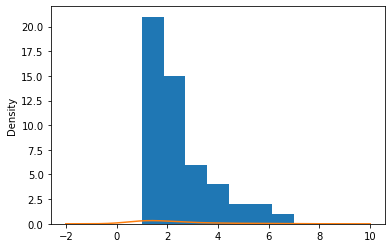

In [4]:
#A histogram and density graph of fields per neighborhood
fields_per_hood.hist(bins=7)
fields_per_hood.plot.density()

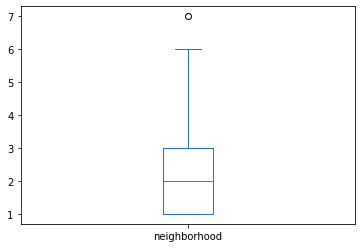

In [5]:
# Boxplot for distribution and outliers
fields_per_hood.plot.box()

### Baseball/Softball Diamonds

Text(0.5, 0, 'Right Field Distance')

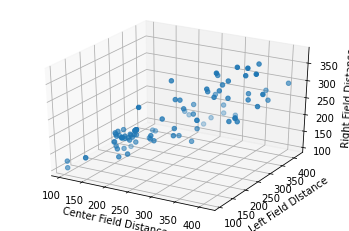

In [6]:
#Scatter plot of field sizes
threed = plt.figure().gca(projection='3d')
threed.scatter(data_pools['center_field_distance'], data_pools['left_field_distance'], data_pools['right_field_distance'])
threed.set_xlabel('Center Field Distance')
threed.set_ylabel('Left Field DIstance')
threed.set_zlabel('Right Field Distance')

Most fields are not full size and are for younger players. But the largest cluster is for boys under the age of 14, because by 14 you reach full or 60/90th (which is also the normal softball field size) size fields. The variation in the larger sizes is standard even in professional fields and are all equally playable.

### Rectangular Fields
With the only auxillary data on rectanugular fields being goal posts and lights, they will com into consideration later.

### Raw Field Amount
Some fields are soley diamond, rectangular, or a hybrid of the two. Below I analize the field baised 

In [7]:
# adding a field count column
data_pools['field_count'] = 1
# filter field data into a new variable
num_fields = data_pools.groupby("neighborhood").sum()['field_count']

In [8]:
#read in the shapefile
neighborhoods = gp.read_file("Neighborhoods/Neighborhoods_.shp")
# merge data to shape map
fields_map = neighborhoods.merge(num_fields,how='left', left_on='hood', right_on='neighborhood')

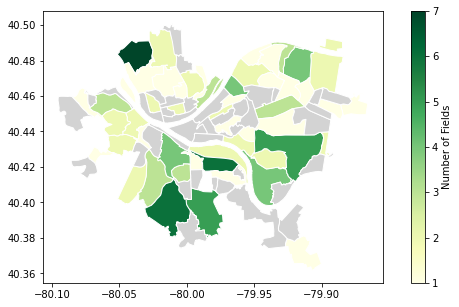

In [18]:
# Color map baised on number of fields
fields_map.plot(column='field_count',
                cmap='YlGn',
                edgecolor="white",
                legend=True,
                legend_kwds={'label': "Number of Fields"},
                figsize=(10,5),
                missing_kwds={"color": "lightgrey"}
               )

### Focusing In
So far I have looked at the data based off of the number of fields in a colormap (diamond, rectangular, and hybrid). As well as the sizes of diamonds.Here I will take the top choices baised on amount into the next stage.

The remaining canidates being, Brighton Heights, South Side Slopes, Brookline, Squirrel Hill South, Carrick, Lower Lawrenceville, Mount Washington, Hazelwood, and Highland Park. From these nine I will decide on a top three.

### Coming to a Conclusion: Jaden

Selection factors include, number of fields, diversity in field type, and field quality (goal poasts and lights). Each neighborhood get 1/2 of a point for a field, 2 extra points for field diversity, and 1/4 of a point for goal posts (football) and lights. By narrowing things down I wasable to more carfully construct my socing system and conclusions with carful analysis.

## 1st Brookline

2 hybrid fields \
1 rectangular field \
3 diamond fields \
4 goal posts \
4 lighted fields \
Total Score of: 7 

## 2nd South Side Slopes

5 diamond fields \
1 rectangular field \
4 lighted fields \
1 goal post \
Total score of: 6.25

## 3rd Carrick

4 diomond fields \
1 rectangular field\
2 goal posts \
3 lighted fields \
Total score of: 5.75

### Remaining Scores

Mout Washington: 5 \
Lower Lawrance: 4.75 \
Hazelwood: 4.5 \
Highland Park: 4 \
Brighton Heights:3.5 

#### Quantity does not equal quality

# Pools

In [13]:
##gets the data into a dataset
##also puts the data into a dataset of only pools, no splash parks
poolData = pd.read_csv('PghPools.csv')
query_mask = poolData['type'] == "Pool"
only_pools = poolData[query_mask]

In [15]:
only_pools['name']

0                   Ammon
1              Banksville
3              Bloomfield
7     Highland - Children
8         Highland - Main
9                Homewood
10             Jack Stack
11                  Magee
12                McBride
14                  Moore
15                 Oliver
16                 Ormsby
17        Phillips - Main
18                   Ream
19              Riverview
20               Schenley
21               Sheraden
22             Sue Murray
24              West Penn
25               Westwood
Name: name, dtype: object

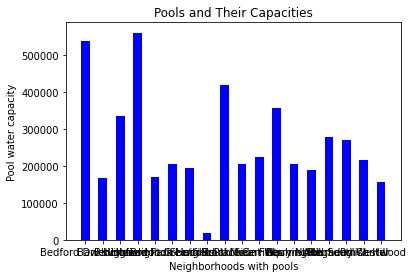

In [16]:
plt.bar(only_pools['neighborhood'], only_pools['capacity'], color = 'blue', width = 0.5)
plt.xlabel("Neighborhoods with pools")
plt.ylabel("Pool water capacity")
plt.title("Pools and Their Capacities")
plt.show()

In [17]:
cap_pools = only_pools.groupby("neighborhood").sum()['capacity']
neighborhood = gp.read_file("Neighborhoods/Neighborhoods_.shp")
pool_map = neighborhood.merge(cap_pools, how = 'left', left_on='hood', right_on='neighborhood')

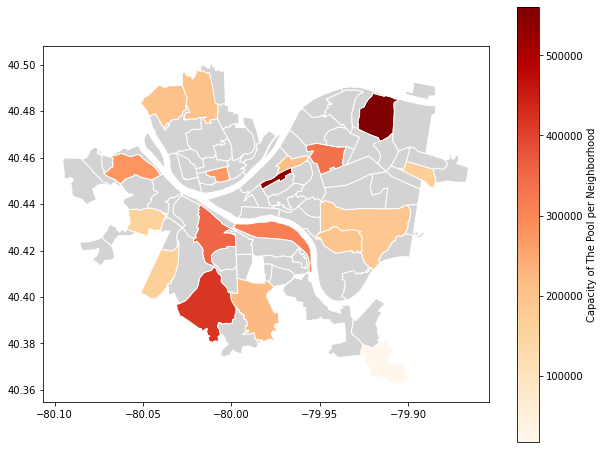

In [19]:
pool_map.plot(column='capacity',
                cmap='OrRd',
                edgecolor="white",
                legend=True,
                legend_kwds={'label': "Capacity of The Pool per Neighborhood"},
                figsize=(10,8),
                missing_kwds={"color": "lightgrey"}
               )

In [20]:
print("The pool with the greatest capacity is in " + only_pools.loc[8, 'neighborhood'] + "and it is called " + only_pools.loc[8, 'name'])
print("The pool with the second greatest capacity is in " + only_pools.loc[0, 'neighborhood'] + "and it is called " + only_pools.loc[0, 'name'])
print("The pool with the third greatest capacity is in " + only_pools.loc[14, 'neighborhood'] + "and it is called " + only_pools.loc[14, 'name'])

The pool with the greatest capacity is in Highland Parkand it is called Highland - Main
The pool with the second greatest capacity is in Bedford Dwellingsand it is called Ammon
The pool with the third greatest capacity is in Brooklineand it is called Moore


# Dom's Conclusion: Pools
The metric I used was the water capacity of pools in the Pittsburgh area. I chose the capacity because there is usually one pool per neighborhood and in order to compare how large the pools are, I needed to use the capacity. A higher capacity means more people at a time are in the pool and on their way to becoming multi-sport athletes. The pool with the largest capacity is Highland - Main in Highland Park. The pool with the second largest capacity is Ammon pool in Bedford Dwellings, and the pool with the third largest capacity is Moore pool in Brookline.


# Rinks and Courts

The top three places with the most courts are Squirrel Hill, South Highland Park, and Hazelwood!


Squirrel Hill South      26
Highland Park            20
Hazelwood                10
Beltzhoover               9
Brookline                 9
                         ..
Marshall-Shadeland        1
Central Lawrenceville     1
Hays                      1
Bon Air                   1
Larimer                   1
Name: neighborhood, Length: 63, dtype: int64

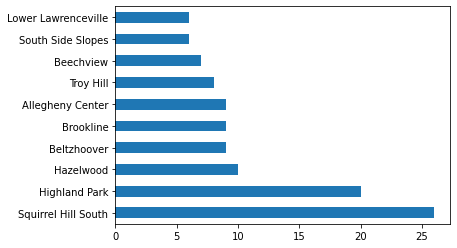

In [23]:
#import the data
import pandas as pd
%matplotlib inline
data = pd.read_csv("courts-and-rinks.csv")
pd.set_option('display.max_rows', 10)

#make a graph showing the top 10 places with the most courts
graph = data['neighborhood'].value_counts()[:10]
graph.plot.barh()

#give a contextualizing statement
print('The top three places with the most courts are Squirrel Hill, South Highland Park, and Hazelwood!')

#print out the counts of the places wotht he most courts
data['neighborhood'].value_counts()